# Homework II with DIAS. Investigating distributions

In [254]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib notebook

## Random sampling

In [198]:
#First generate array of wanted numbers of size n in uniform sample (-L,L)
n=100000
L=10
xs=np.random.uniform(-L,L,[n,1])

#Define the Gaussian exponential 
def gaussian(x):
    return np.exp(-1*(x**2))

#Find the weight for each configuration
weights=gaussian(xs)

#Find the Partition function by summing the weights 
partition=np.sum(weights)

#Now find the mean 
mean_sum_elements=((xs)**2) * weights/partition
mean_sum=np.sum(mean_sum_elements)

print(mean_sum)

0.5012551128604227


## Metropolis Algorithm

In [238]:
#Randomly generate the first configuration
L=10
x0=L*np.random.uniform(-1,1)
suc=0
n_it=0
terms_wanted=1e5

#Store the successes
x_suc=np.array([x0])

#Start testing
while len(x_suc)<terms_wanted:
    n_it+=1
    x_placeholder=x_suc[-1] + 1.1*np.random.uniform(-1,1)
    ds=((x_placeholder)**2)-((x_suc[-1])**2)
    eds=np.exp(-1*ds)
    if eds>np.random.uniform(0,1):
        suc+=1
        x_suc=np.append(x_suc, np.array([x_placeholder]))

0.4792228828679509
The ratio is 0.7059134964951045


<IPython.core.display.Javascript object>


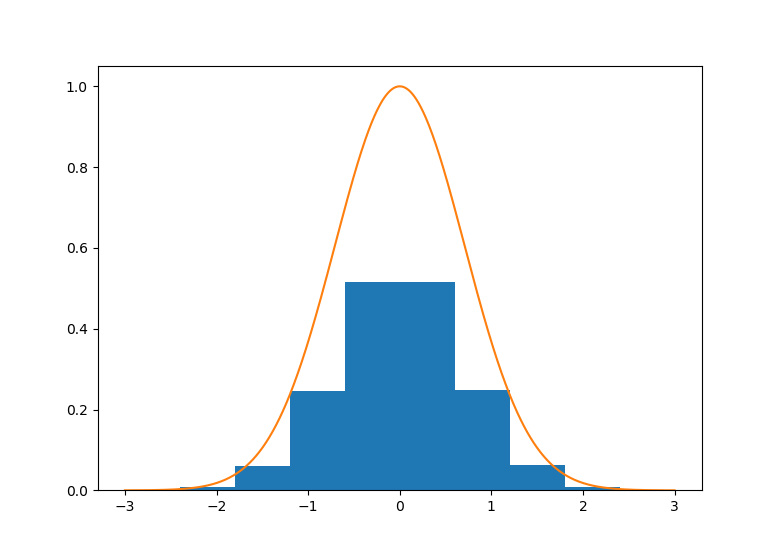

In [255]:
#Find mean sum to compare
squared_els=x_suc**2
mean_M=np.mean(squared_els)
print(mean_M)

#Ratio of successes. Want it at 0.7, so change epsilon to reflect this
ratio=suc/n_it
print('The ratio is', ratio)

#Histogram plot
%matplotlib notebook
plt.hist(x_suc, align='mid', range=[-3,3], density=1)
x_range=np.linspace(-3,3,1000)
plt.plot(x_range, np.exp(-1*(x_range)**2))